Converged at iteration no. 5


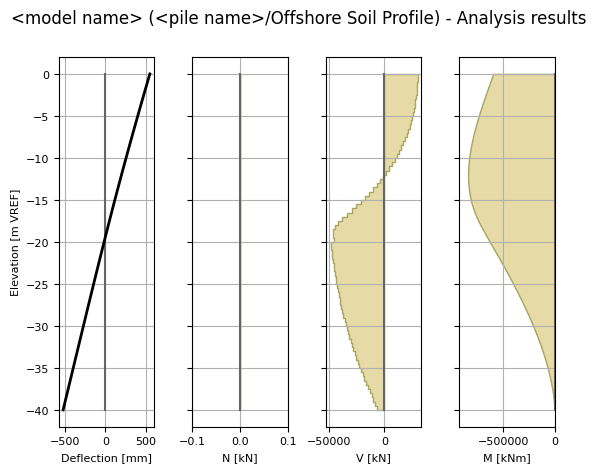

In [31]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand


p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-40, diameter=10, wt=0.050
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic", extension="mt_curves"),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic", extension="mt_curves"),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=sp)

# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Mz=-600e3, Py=30e3)

# Run analysis
from openpile.analyze import simple_winkler_analysis

Result = simple_winkler_analysis(M)

# plot the results
Result.plot()


In [30]:
Result.deflection


,Elevation [m],Deflection [m]
0,0.0,1.017491
1,-0.5,0.990865
2,-1.0,0.964277
3,-1.5,0.937728
4,-2.0,0.911219
...,...,...
76,-38.0,-0.878481
77,-38.5,-0.902531
78,-39.0,-0.926586
79,-39.5,-0.950646


In [ ]:
layer = Layer(
    name="Soft Clay",
    top=-10,
    bottom=0,
    weight=19,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], Neq=100),
)


In [ ]:
from openpile.construct import SoilProfile, Layer
from openpile.soilmodels import API_sand, API_clay

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic"),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic"),
        ),
    ],
)

print(sp)


Layer 1
------------------------------
Name: medium dense sand
Elevation: (0.0) - (-20.0) m
Weight: 18.0 kN/m3
Lateral model: 	API sand
	phi = 33.0°
	cyclic curves
Axial model: None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Layer 2
------------------------------
Name: firm clay
Elevation: (-20.0) - (-40.0) m
Weight: 18.0 kN/m3
Lateral model: 	API clay
	Su = 50.0-70.0 kPa
	eps50 = 0.015
	cyclic curves
Axial model: None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [ ]:
from openpile.construct import Layer
from openpile.soilmodels import API_clay

# Create a layer
layer1 = Layer(
    name="Soft Clay",
    top=0,
    bottom=-10,
    weight=18,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], kind="static"),
)

print(layer1)


Name: Soft Clay
Elevation: (0.0) - (-10.0) m
Weight: 18.0 kN/m3
Lateral model: 	API clay
	Su = 30.0-35.0 kPa
	eps50 = 0.01-0.02
	static curves
Axial model: None


Text(0.5, 0, 'y [m]')

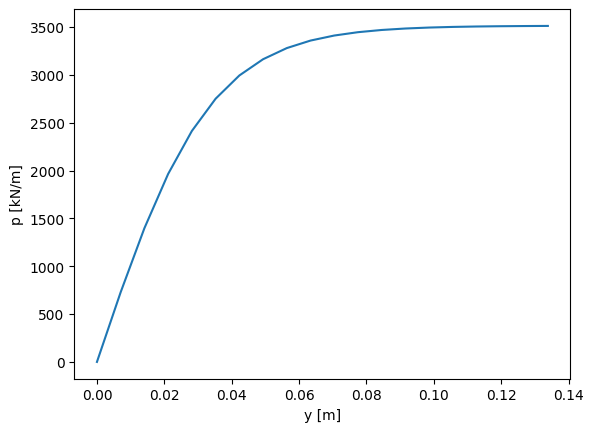

In [ ]:
import matplotlib.pyplot as plt
from openpile.utils.py_curves import api_sand

p, y = api_sand(
    sig=50,  # vertical stress in kPa
    X=5,  # depth in meter
    phi=35,  # internal angle of friction
    D=5,  # the pile diameter
    below_water_table=True,  # use initial subgrade modulus under water
    kind="static",  # static curve
)

plt.plot(y, p)
plt.ylabel("p [kN/m]")
plt.xlabel("y [m]")


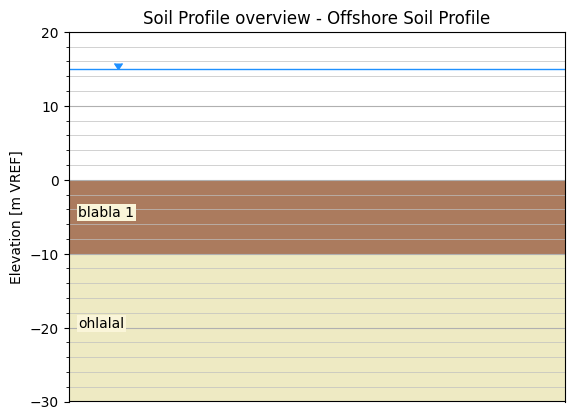

In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import Dunkirk_sand, Cowden_clay, API_clay

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [6, 6],
        "diameter": [2.0, 2.0],
        "wall thickness": [0.07, 0.08],
    },
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="blabla 1",
            top=0,
            bottom=-10,
            weight=18,
            lateral_model=Cowden_clay(Su=150, G0=30e3),
        ),
        Layer(
            name="ohlalal",
            top=-10,
            bottom=-30,
            weight=18,
            lateral_model=Cowden_clay(Su=150, G0=30e3),
        ),
    ],
)

sp.plot()


In [1]:
# import libraries
from openpile.construct import Pile, Model
from openpile.analyze import simple_beam_analysis

# create pile
pile = Pile(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={"length": [40], "diameter": [2], "wall thickness": [0.08]},
)

M = Model(name="", pile=pile)
M.set_support(elevation=0, Tx=True, Ty=True)
M.set_support(elevation=-40, Ty=True)
M.set_pointload(elevation=-20, Py=1000)

result = simple_beam_analysis(M)


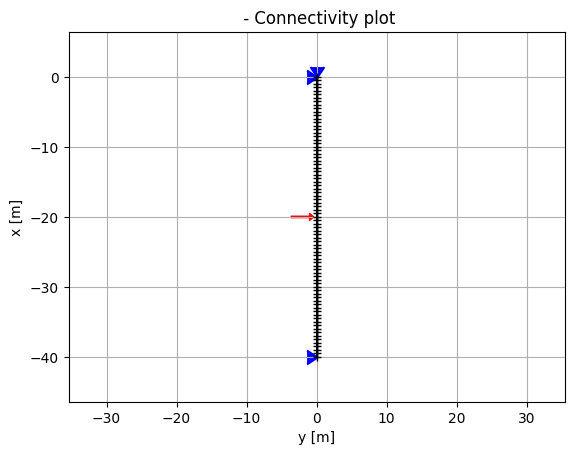

In [2]:
M.plot()


In [3]:
result.reactions


,Elevation [m],Nr [kN],Vr [kN],Mr [kNm]
0,0.0,0.0,-500.0,0.0
1,-40.0,0.0,-500.0,0.0


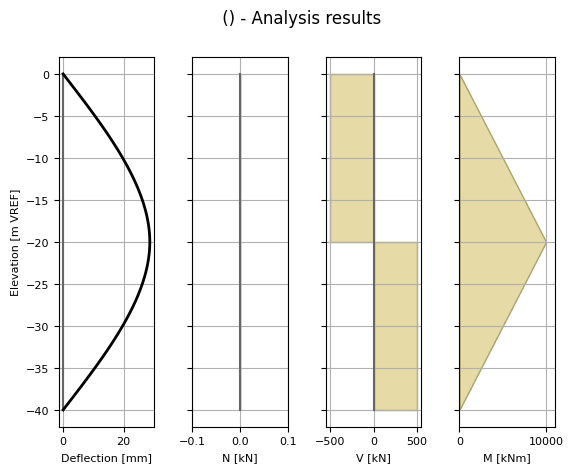

In [4]:
result.plot()


Text(0.5, 0, 'y [m]')

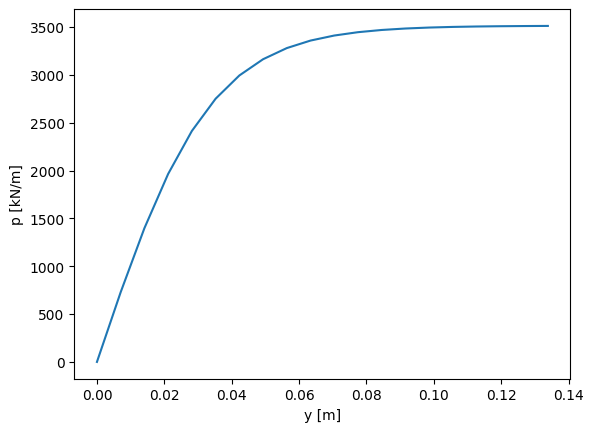

In [2]:
# import p-y curve for api_sand from openpile.utils
from openpile.utils.py_curves import api_sand

y, p = api_sand(
    sig=50,  # vertical stress in kPa
    X=5,  # depth in meter
    phi=35,  # internal angle of friction
    D=5,  # the pile diameter
    below_water_table=True,  # use initial subgrade modulus under water
    kind="static",  # static curve
)

# create a plot of the results with Matplotlib
import matplotlib.pyplot as plt

plt.plot(y, p)
plt.ylabel("p [kN/m]")
plt.xlabel("y [m]")
